In [1]:
!python datasets.py

In [26]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import io
import pickle

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from sklearn. preprocessing import scale

In [80]:
## source: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
## support for permutation_importance : https://towardsdatascience.com/a-relook-on-random-forest-and-feature-importance-2467dfab5cca


## maybe n_repeats should be used?
def show_feature_permutation_importance(model):
    scoring = ['roc_auc', 'accuracy']#
    r_multi = permutation_importance(
        model, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)

    features= list(twitter.columns)[6:-2]
    roc_auc_importance = []
    roc_auc_std = []
    acc_importance =[]
    acc_std=[]
    for metric in r_multi:
        print(f"{metric}")
        r = r_multi[metric]
        for i in range(len(features)):
            #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
            print(i,f"    {list(twitter.columns)[6:-2][i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            if metric == 'roc_auc':
                roc_auc_importance.append(r.importances_mean[i])
                roc_auc_std.append(r.importances_std[i])
                roc_auc_importance_df =pd.DataFrame(r.importances, index = features).transpose()
                
            if metric == 'accuracy': 
                acc_importance.append(r.importances_mean[i])
                acc_std.append(r.importances_std[i])
                acc_importance_df =pd.DataFrame(r.importances, index = features).transpose()
                


    d = {'features': features, 'acc_importance': acc_importance, 'roc_auc_importance': roc_auc_importance}
    importance_df = pd.DataFrame(d)


    plt.figure(figsize=(15, 30))# how many inches big each image is 

    ax = plt.subplot(211)# nrows,ncols,index

    importance_df = importance_df.sort_values(by = 'acc_importance')
    importance_df.plot(x = 'features', y ='acc_importance', kind = 'bar',ax = ax)
    plt.xticks(rotation = 'vertical')
    ax.set_title("Feature importance of Random Forest based on accuracy")
    ax.set_ylabel("permutation importance")
   
    '''
    ax = plt.subplot(222)
    importance_df = importance_df.sort_values(by = 'roc_auc_importance')
    importance_df.plot(x = 'features', y ='roc_auc_importance', kind = 'bar', ax =ax)
    plt.xticks(rotation = 'vertical')
    ax.set_title("Feature importance of Random Forest based on roc_auc")
    ax.set_ylabel("permutation importance")  
    
    ax = plt.subplot(223)
    roc_auc_importance_df.plot(kind = "box",ax =ax,meanline=True)
    plt.xticks(rotation = 'vertical')
    ax.set_title("Feature importance from roc_auc")
    '''
    sorted_index = acc_importance_df.mean().sort_values().index
    print('sorted index:',sorted_index)
    acc_importance_df=acc_importance_df[sorted_index]
    ax = plt.subplot(212)
    acc_importance_df.boxplot(ax =ax, meanline=True)#x = list(importance_df.columns)
    plt.xticks(rotation = 'vertical')
    ax.set_title("Feature importance from accuracy")

    

    
    return roc_auc_importance_df, acc_importance_df, importance_df

In [4]:


import datasets

DS = datasets.Datasets()



In [5]:
tweets = DS.tweets_df
retweets = DS.retweets_df
twitter = tweets.append(retweets)

In [6]:

twitter = twitter.fillna(0)

In [ ]:
## import analysis. Maybe make into modules

In [ ]:
twitter

In [ ]:
import math
## maybe balance the number of tweets from each?
dfH = twitter.loc[twitter['Candidate']=='HC',:]
print("HC length: ",len(dfH))

dfT =twitter.loc[twitter['Candidate']=='DT',:]
print("DT length: ",len(dfT))

#print(.5*(len(dfT)/len(dfH))

df_new = twitter

#df_new = df.append(dfH)
df_new = df_new.append(dfH)
#df_new = df_new.append(dfH[:math.floor(len(dfH)*.33)])
print("DT length ratio: ",len(dfT)/len(df_new))

twitter = df_new

In [ ]:
##sum(list(twitter.loc[:,"Num Prop"]==0))## this confirms that there is always at least one instance of propaganda

In [10]:
from sklearn.model_selection import train_test_split

X = twitter.loc[:,'Loaded_Language':'Thought-terminating_Cliches',]
Y = twitter.loc[:,"BCandidate"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)

In [ ]:
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
'''
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('SVM', SVC(gamma='auto'))) 
models.append(('ETC', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('RFC', RandomForestClassifier(max_depth= 2, random_state = 0)))  
models.append(('null0', DummyRegressor(strategy="constant", constant= 0)))
models.append(('null1', DummyRegressor(strategy="constant", constant= 1)))


results = []
names = []
roc_auc= []
fitted_mods=[]
conf_mat= []
predictions = []


for name, model in models: 
    print(model)
    print(name)
    fitted_mods.append(model.fit(X_train, Y_train))
 
    names.append(name)
    
for i in fitted_mods: 
	roc_auc.append(roc_auc_score(Y_test,i.predict(X_test)))
	results.append(accuracy_score(Y_test, i.predict(X_test)))

#	conf_mat.append(confusion_matrix(Y_test, i.predict(X_test)))
 
	predictions.append(i.predict(X_test))
 
#print(roc_auc)
print(results)
print(conf_mat)
print(predictions)'''

In [ ]:
'''## printing imporant stats
for i in range(len(names)):
  print(names[i],'accuracy:' , results[i], 'roc auc:',roc_auc[i])
  cm = confusion_matrix(Y_test,predictions[i])
  ConfusionMatrixDisplay(cm).plot()

plt.show()'''

# cross validated gridsearches:

## C-Support Vector Classification

In [ ]:
granularity1 = 10 ## make smaller when running on a more powerful computer

In [ ]:
from sklearn.model_selection import GridSearchCV
# support vector machine

SVCCV = GridSearchCV(
SVC(gamma='auto'), param_grid = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : list(range(1,30,granularity1))


},
scoring = "accuracy")

SVCCV.fit(X_train,Y_train)

In [ ]:
filename = 'SVC_GS_twitter'
pickle.dump(SVCCV, open(filename,'wb'))

In [ ]:
##reading in trained model
loaded_model = pickle.load(open(filename, 'rb'))
#loaded_model.best_params_ ## the best parameters can be easily reached using this method

In [ ]:
print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


In [112]:
str(loaded_model)

"GridSearchCV(estimator=ExtraTreesClassifier(),\n             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,\n                                          91],\n                         'random_state': [1, 11, 21, 31, 41, 51, 61, 71, 81,\n                                          91]},\n             scoring='accuracy')"

## extra trees

In [11]:

ETCV = GridSearchCV(ExtraTreesClassifier(),param_grid = {
    'n_estimators' : list(range(1,100,granularity1)),# no real benefit from 1,100
    'random_state' : list(range(1,100,granularity1))
},
                   scoring = 'accuracy')

ETCV.fit(X_train,Y_train)

filename = 'extra_trees_GS_twitter'
pickle.dump(ETCV, open(filename,'wb')) 

NameError: name 'GridSearchCV' is not defined

extra_trees_GS_twitter results on test data
roc_auc: 0.6684399088046901
accurarcy: 0.6973684210526315
note 1 is Donald Trump


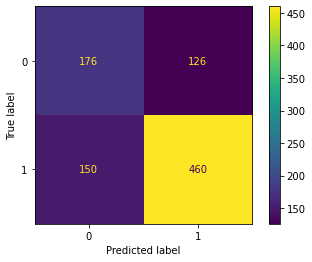

In [12]:
filename = 'extra_trees_GS_twitter'
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

roc_auc
0     Loaded_Language-0.005 +/- 0.002
1     Name_Calling,Labeling-0.001 +/- 0.003
2     Repetition0.068 +/- 0.016
3     Exaggeration,Minimisation0.007 +/- 0.004
4     Doubt   0.002 +/- 0.002
5     Appeal_to_fear-prejudice0.028 +/- 0.007
6     Flag-Waving0.023 +/- 0.006
7     Causal_Oversimplification0.004 +/- 0.001
8     Slogans 0.006 +/- 0.005
9     Appeal_to_Authority0.003 +/- 0.002
10     Black-and-White_Fallacy0.012 +/- 0.004
11     Thought-terminating Cliches0.000 +/- 0.000
12     Whataboutism,Straw_Men,Red_Herring0.005 +/- 0.003
13     Obfuscation,Intentional_Vagueness,Confusion0.000 +/- 0.000
14     Bandwagon,Reductio_ad_hitlerum-0.000 +/- 0.000
15     Num Prop0.056 +/- 0.009
16     Thought-terminating_Cliches0.007 +/- 0.001
accuracy
0     Loaded_Language0.028 +/- 0.006
1     Name_Calling,Labeling0.022 +/- 0.004
2     Repetition0.056 +/- 0.007
3     Exaggeration,Minimisation0.010 +/- 0.005
4     Doubt   0.000 +/- 0.001
5     Appeal_to_fear-prejudice0.016 +/- 0.005
6     

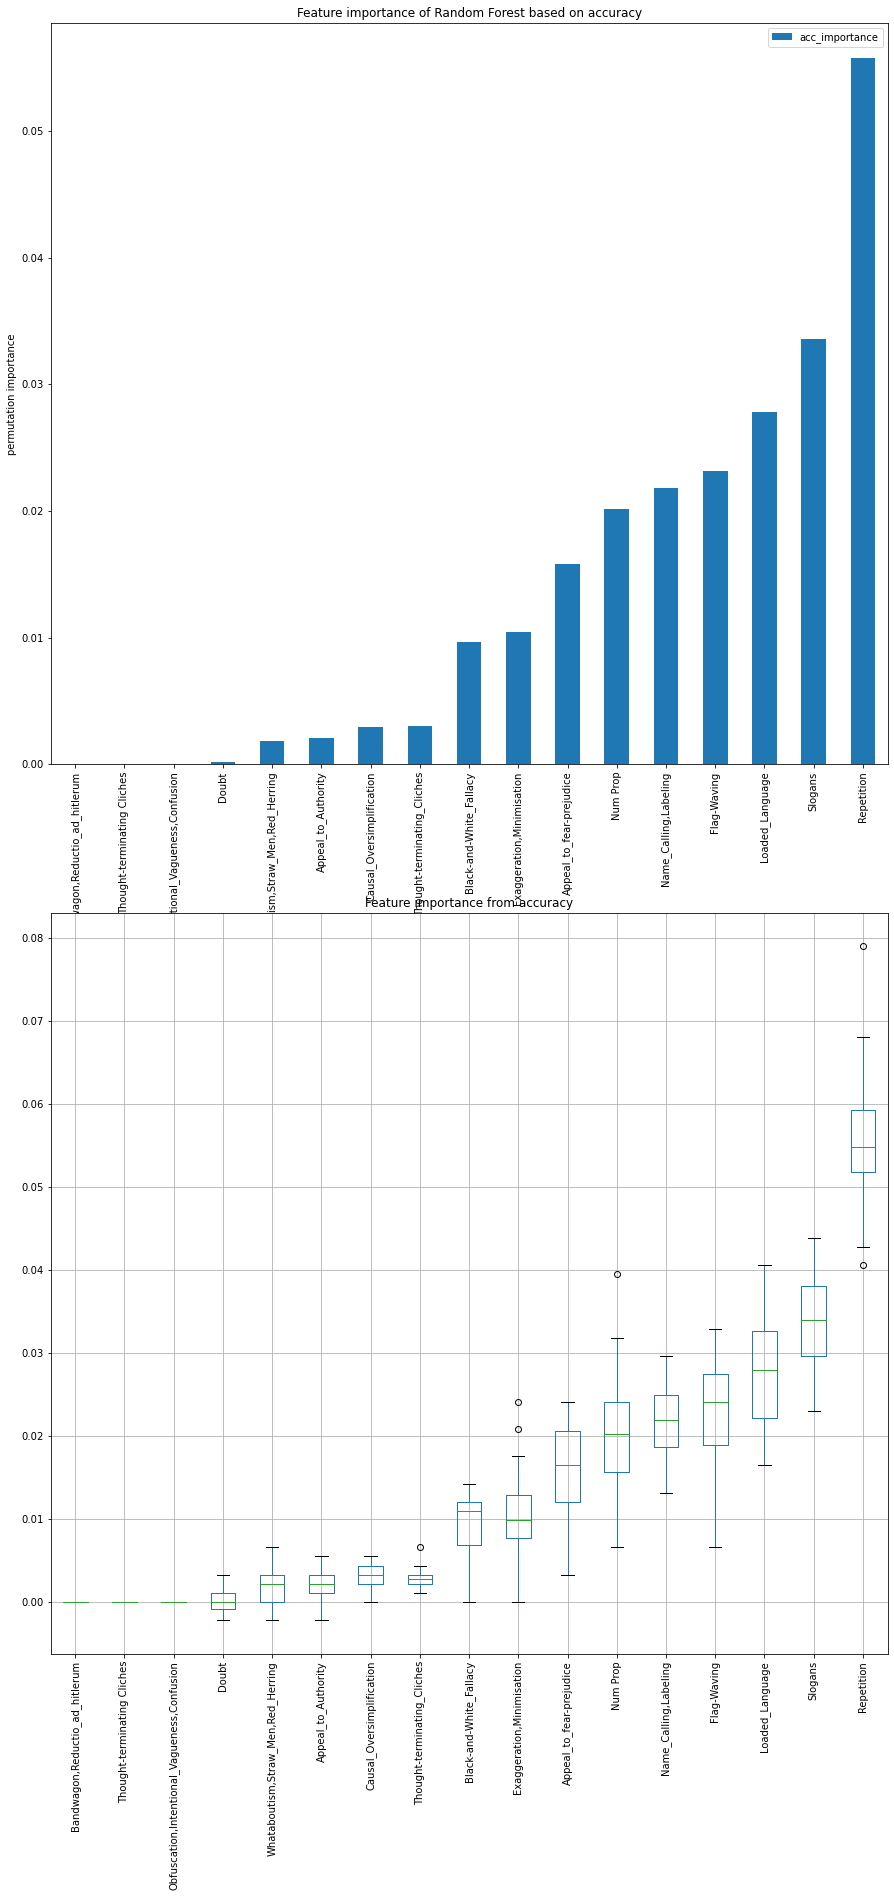

In [81]:
a,b,c =show_feature_permutation_importance(loaded_model)

In [79]:
b

,"Bandwagon,Reductio_ad_hitlerum",Thought-terminating Cliches,"Obfuscation,Intentional_Vagueness,Confusion",Doubt,"Whataboutism,Straw_Men,Red_Herring",Appeal_to_Authority,Causal_Oversimplification,Thought-terminating_Cliches,Black-and-White_Fallacy,"Exaggeration,Minimisation",Appeal_to_fear-prejudice,Num Prop,"Name_Calling,Labeling",Flag-Waving,Loaded_Language,Slogans,Repetition
0,0.0,0.0,0.0,0.000000,0.002193,0.004386,0.005482,0.003289,0.007675,0.005482,0.015351,0.023026,0.020833,0.020833,0.029605,0.031798,0.051535
1,0.0,0.0,0.0,-0.001096,-0.001096,0.000000,0.003289,0.003289,0.012061,0.017544,0.019737,0.018640,0.027412,0.032895,0.016447,0.043860,0.057018
2,0.0,0.0,0.0,0.001096,0.004386,0.005482,0.001096,0.002193,0.012061,0.014254,0.024123,0.026316,0.021930,0.024123,0.028509,0.039474,0.054825
3,0.0,0.0,0.0,-0.001096,0.000000,0.003289,0.002193,0.002193,0.013158,0.006579,0.018640,0.006579,0.015351,0.029605,0.030702,0.037281,0.046053
4,0.0,0.0,0.0,-0.001096,0.003289,-0.002193,0.003289,0.004386,0.009868,0.009868,0.019737,0.012061,0.019737,0.027412,0.038377,0.039474,0.059211
5,0.0,0.0,0.0,0.000000,0.002193,0.002193,0.002193,0.002193,0.009868,0.009868,0.003289,0.028509,0.024123,0.025219,0.025219,0.023026,0.055921
6,0.0,0.0,0.0,-0.001096,0.000000,0.002193,0.002193,0.002193,0.014254,0.007675,0.012061,0.019737,0.020833,0.024123,0.031798,0.036184,0.051535
7,0.0,0.0,0.0,0.000000,0.003289,0.001096,0.004386,0.002193,0.004386,0.024123,0.016447,0.021930,0.013158,0.026316,0.032895,0.037281,0.053728
8,0.0,0.0,0.0,0.001096,0.003289,0.002193,0.001096,0.002193,0.012061,0.006579,0.021930,0.021930,0.018640,0.031798,0.027412,0.029605,0.066886
9,0.0,0.0,0.0,0.000000,0.000000,0.002193,0.002193,0.003289,0.010965,0.012061,0.020833,0.019737,0.023026,0.023026,0.024123,0.033991,0.055921


In [15]:
ET = ExtraTreesClassifier(n_estimators =loaded_model.best_params_['n_estimators'],random_state = loaded_model.best_params_['random_state'] )
ET.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=1, random_state=61)

Feature ranking:
1. feature 13 (0.000000) name: Appeal_to_fear-prejudice
2. feature 11 (0.000000) name: Black-and-White_Fallacy
3. feature 7 (0.001028) name: Appeal_to_Authority
4. feature 14 (0.001823) name: Num Prop
5. feature 16 (0.003259) name: Repetition
6. feature 4 (0.005179) name: Thought-terminating_Cliches
7. feature 3 (0.009352) name: Bandwagon,Reductio_ad_hitlerum
8. feature 9 (0.022480) name: Name_Calling,Labeling
9. feature 8 (0.023515) name: Slogans
10. feature 1 (0.028913) name: Thought-terminating Cliches
11. feature 12 (0.037334) name: Loaded_Language
12. feature 10 (0.039401) name: Whataboutism,Straw_Men,Red_Herring
13. feature 0 (0.053165) name: Obfuscation,Intentional_Vagueness,Confusion
14. feature 5 (0.131681) name: Doubt
15. feature 15 (0.181656) name: Flag-Waving
16. feature 6 (0.229781) name: Exaggeration,Minimisation
17. feature 2 (0.231432) name: Causal_Oversimplification


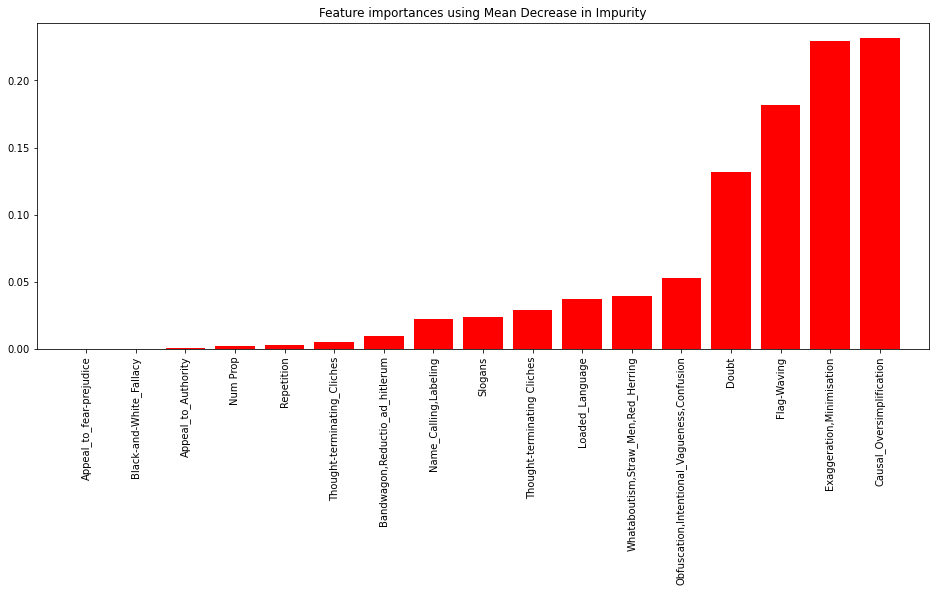

In [43]:
importances = ET.feature_importances_
std = np.std([ET.feature_importances_ for tree in ET.estimators_],
             axis=0)
indices = np.argsort(importances)
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]  #names of features.
ff = np.array(feature_list)

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) name: %s" % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))

    
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances using Mean Decrease in Impurity")## MDI
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
N,M = X_train.shape 
print(N,M)## rows and columns 

out = {}## dictoionary 
importances

3648 17


array([0.05316536, 0.02891292, 0.2314319 , 0.00935187, 0.0051786 ,
       0.13168067, 0.22978119, 0.00102827, 0.0235146 , 0.02248013,
       0.03940136, 0.        , 0.0373344 , 0.        , 0.00182334,
       0.18165624, 0.00325913])

In [18]:
set(Y_train)## the different values that Y_train can take ie the different categories
print(list(range(N)))## so this is going to be a range object but basically a list 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [82]:

X = scale(X_train)
for c in set(Y_train):
    print(range(N))
    print(X[Y_train==c, :],"shape:", X[Y_train==c, :].shape)

range(0, 3648)
[[-0.49670285 -0.37814872 -0.35900907 ... -0.04384688 -0.60490392
  -0.19546363]
 [-0.49670285 -0.37814872 -0.35900907 ... -0.04384688  1.08734262
  -0.19546363]
 [-0.49670285  2.13916249 -0.35900907 ... -0.04384688 -0.60490392
  -0.19546363]
 ...
 [ 1.47069345 -0.37814872 -0.35900907 ... -0.04384688 -0.60490392
  -0.19546363]
 [-0.49670285 -0.37814872 -0.35900907 ... -0.04384688 -0.60490392
  -0.19546363]
 [-0.49670285 -0.37814872 -0.35900907 ... -0.04384688  1.08734262
  -0.19546363]] shape: (1220, 17)
range(0, 3648)
[[ 1.47069345 -0.37814872 -0.35900907 ... -0.04384688 -0.60490392
  -0.19546363]
 [-0.49670285 -0.37814872  2.39238818 ... -0.04384688 -0.60490392
  -0.19546363]
 [-0.49670285 -0.37814872 -0.35900907 ... -0.04384688  1.08734262
  -0.19546363]
 ...
 [-0.49670285 -0.37814872 -0.35900907 ... -0.04384688  1.08734262
  -0.19546363]
 [ 1.47069345 -0.37814872 -0.35900907 ... -0.04384688  1.08734262
  -0.19546363]
 [-0.49670285 -0.37814872  2.39238818 ... -0.04384

In [86]:
import seaborn as sns

dummy_df1 = pd.concat([X_train, Y_train]) 

sns.boxplot(x = dummy_df1.loc[:,:-1], y = dummy_df1.loc[:,-1])

TypeError: cannot do slice indexing on Index with these indexers [-1] of type int

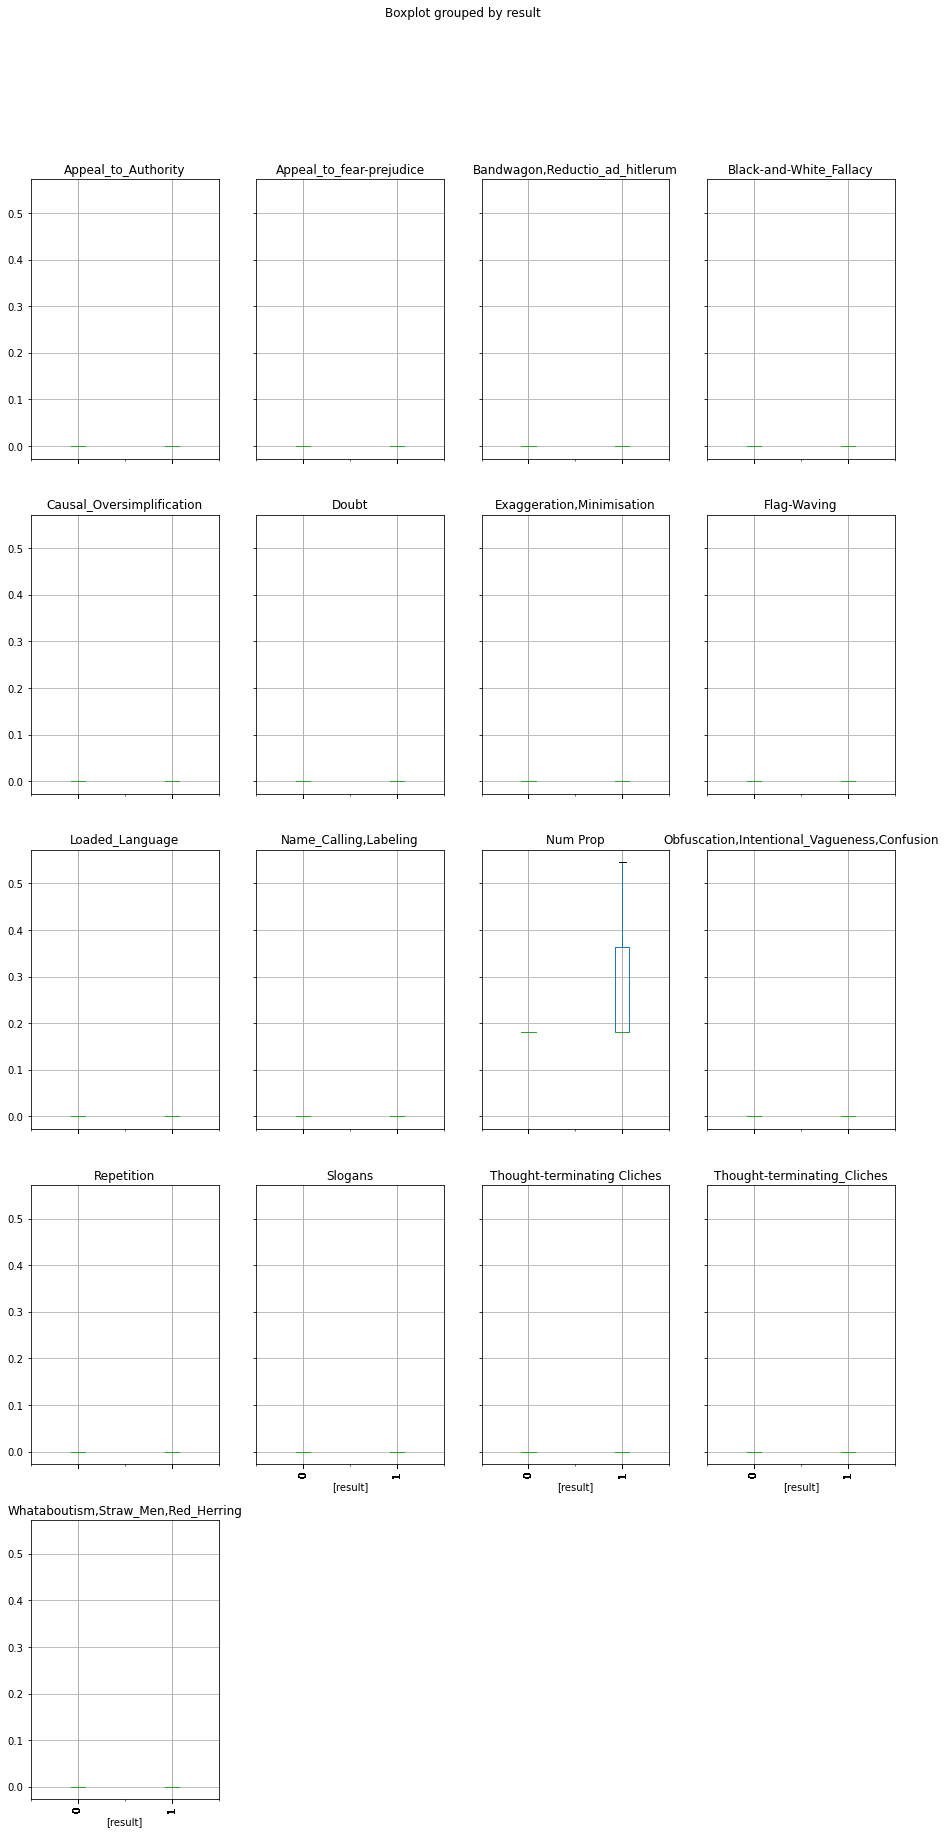

In [105]:
dummy_df1 = pd.DataFrame(X_train.loc[Y_train==1, :]*importances)
dummy_df1 = dummy_df1.assign(result =lambda Candidate	: '1')

dummy_df0 = pd.DataFrame(X_train.loc[Y_train==0, :]*importances)
dummy_df0 = dummy_df0.assign(result =lambda Candidate	: '0')


dummy_df = dummy_df1.append(dummy_df0)



plt.figure(figsize=(15, 30))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)



#dummy_df.plot(kind = 'box', by = 'result')## you can only have kind or by 
dummy_df.boxplot( meanline = True, by = 'result', figsize = (5,15), rot = 90, ax = ax, showfliers = False)## you can only have kind or by 
#plt.xticks(rotation= 'vertical')
plt.ylim(-.1,.5)

plt.show()

In [22]:
for c in set(Y_train):
    print(range(N))
    print(X_train.loc[Y_train==c, :]*importances)

range(0, 3648)
      Loaded_Language  Name_Calling,Labeling  Repetition  \
2667         0.000000               0.000000    0.000000   
2511         0.000000               0.000000    0.000000   
2454         0.000000               0.028913    0.000000   
2604         0.000000               0.028913    0.000000   
2004         0.000000               0.000000    0.231432   
...               ...                    ...         ...   
3302         0.000000               0.000000    0.000000   
3426         0.053165               0.000000    0.000000   
2289         0.053165               0.000000    0.000000   
2785         0.000000               0.000000    0.000000   
3236         0.000000               0.000000    0.000000   

      Exaggeration,Minimisation  Doubt  Appeal_to_fear-prejudice  Flag-Waving  \
2667                        0.0    0.0                       0.0     0.229781   
2511                        0.0    0.0                       0.0     0.000000   
2454                 

In [23]:
result

NameError: name 'result' is not defined

In [25]:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)## this seems to normalize data ie subtract mean and devide by std- 
    # the algorithm dosen'twork without scaling

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )
        
    return out


result = class_feature_importance(X_train, Y_train, importances)

titles = ["Did not Divert", "Diverted"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()


NameError: name 'scale' is not defined

## random forest

In [ ]:
RFCV = GridSearchCV(RandomForestClassifier(), param_grid={ 
    'n_estimators' : list(range(1,100,granularity1)),
    'max_depth': list(range(2,100,granularity1)),
    'random_state': list(range(10,100,granularity1))

})
RFCV.fit(X_train,Y_train)

filename = 'RFCV_GS_twitter'
pickle.dump(RFCV, open(filename,'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
show_feature_importance(RFCV)

## lasso

In [ ]:
LOCV = GridSearchCV( linear_model.Lasso(), param_grid={ 
    'alpha' : list(np.arange (.1, 50, .1))

})
LOCV.fit(X_train,Y_train)

filename = 'lasso_GS_twitter'
pickle.dump(LOCV, open(filename,'wb')) 

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
## no feature importance?
## everything is 0 when computed 

## neural net- may need to adjust parameters

In [ ]:
NNCV = GridSearchCV( MLPClassifier(max_iter=10000), param_grid={ 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [1e-5,1e-4,1e-3,1e-2],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],

})
NNCV.fit(X_train,Y_train)

filename = 'NNCV_GS_twitter'
pickle.dump(NNCV, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [109]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X_train,Y_train)
chi_scores

(array([1.87569895e+01, 2.41435384e+01, 1.10473259e+02, 1.24321698e+01,
        3.94669337e-02, 5.80282638e+01, 8.95255139e+01, 1.04685452e-01,
        1.59779758e+00, 1.04002722e+01, 1.67075053e+01,            nan,
        1.77521053e+01,            nan, 2.78716304e-01, 1.93642233e+01,
        8.61000120e-01]),
 array([1.48478169e-05, 8.94156803e-07, 7.71795134e-26, 4.22001326e-04,
        8.42526475e-01, 2.58378669e-14, 3.02709311e-21, 7.46277753e-01,
        2.06215606e-01, 1.25996737e-03, 4.36081365e-05,            nan,
        2.51638867e-05,            nan, 5.97543834e-01, 1.08011737e-05,
        3.53458967e-01]))

<AxesSubplot:>

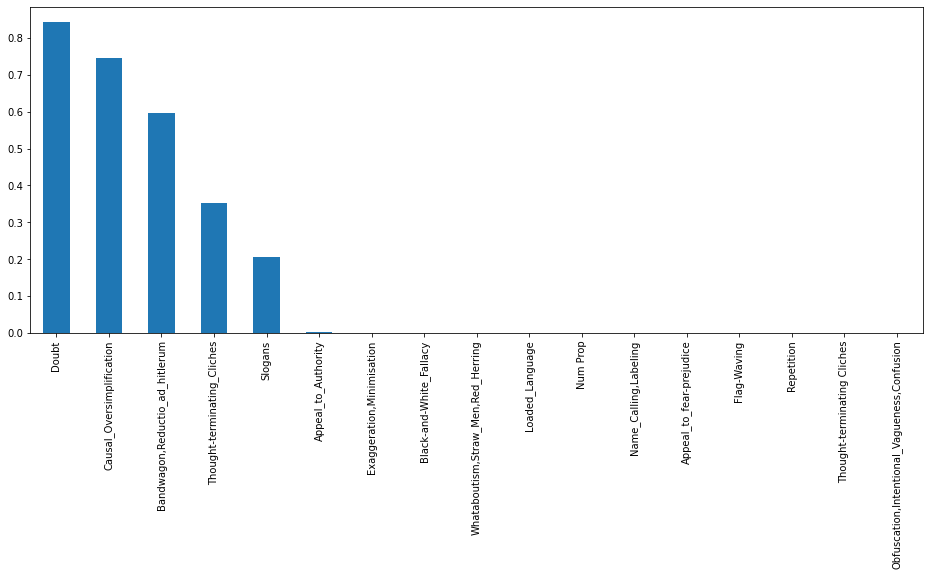

In [111]:
p_values = pd.Series(chi_scores[1],index = X_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()